In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from os import path
from matplotlib import pyplot as plt

data_dir = path.join('..', 'data')
img_dir = path.join(data_dir, 'img')
temp_dir = path.join(data_dir, 'temp')

dataset_file = 'merged_data4.csv'

data = pd.read_csv(path.join(data_dir, dataset_file), sep='`')
data = data.sort_values(by=['timestamp'])

In [2]:
numerical_data = data[[
    'created', 
    'score', 
    'comms_num', 
    'upvote_ratio',
    'is_oc',
    'is_self',
    'sin_time',
    'cos_time',
    'sin_date',
    'cos_date',
    'words_in_titles',
    'words_in_body',
    'title_capital_letters_count',
    'title_capital_letters_ratio',
    'body_capital_letters_count',
    'body_capital_letters_ratio',
    'title_emoji_count',
    'title_emojis_ratio',
    'body_urls_count',
    'body_emoji_count', 
    'body_emojis_ratio', 
    'image_text_words', 
    'imgs_count',
]]

filtered_numerical_data = numerical_data[~(
    (numerical_data.created > 1611702000)
    & (numerical_data.created < 1611874799)
)]

numerical_data.drop(['created'], axis=1, inplace=True)
filtered_numerical_data.drop('created', axis=1, inplace=True)

c:\users\techw\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Mapa korelacji

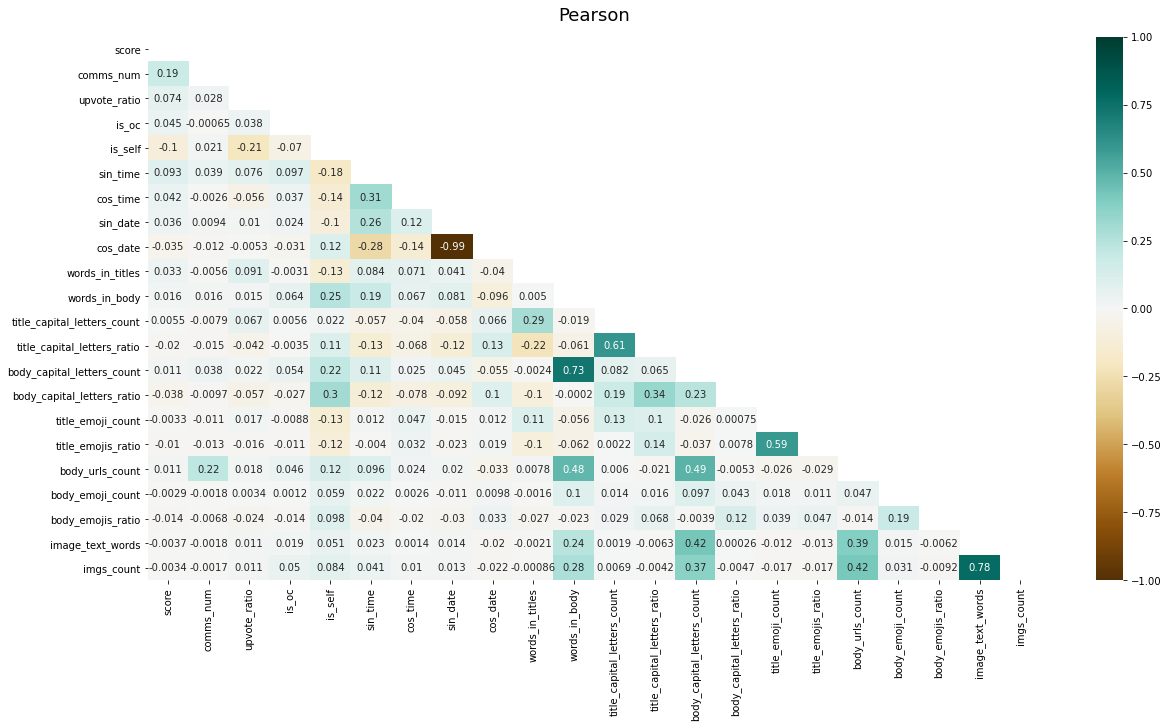

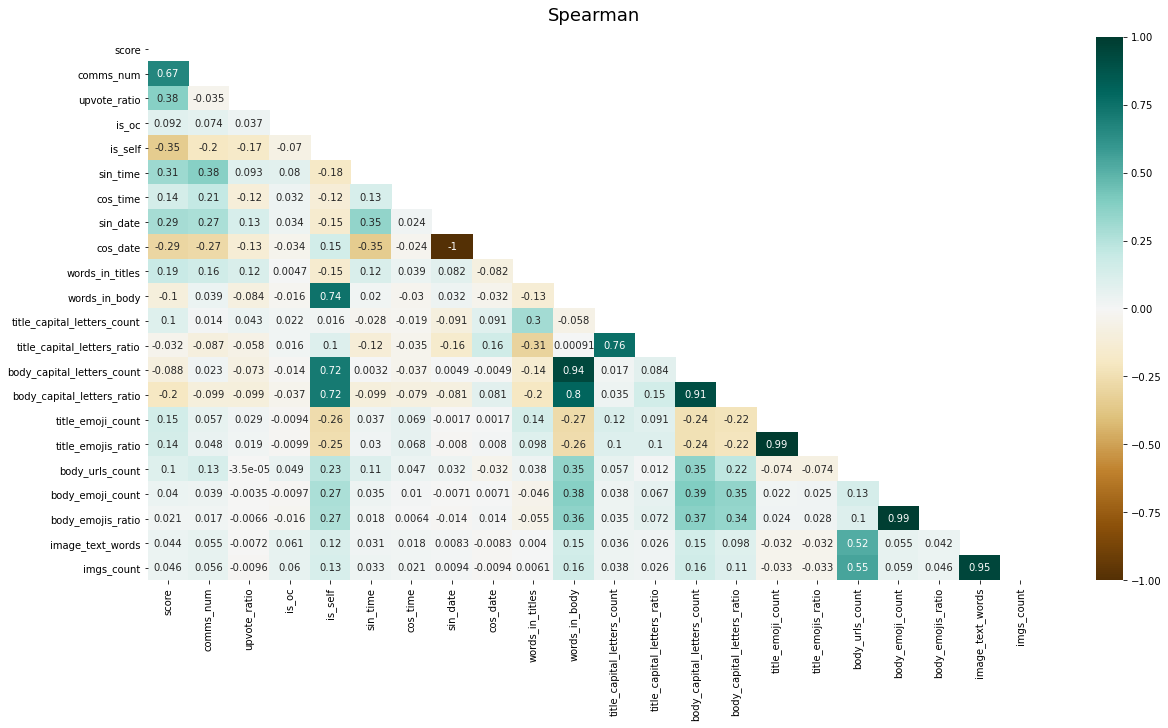

In [6]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(numerical_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Pearson', fontdict={'fontsize':18}, pad=16);

plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(numerical_data.corr(method='spearman'), dtype=np.bool))
heatmap = sns.heatmap(numerical_data.corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Spearman', fontdict={'fontsize':18}, pad=16);

## Korelacje z oceną

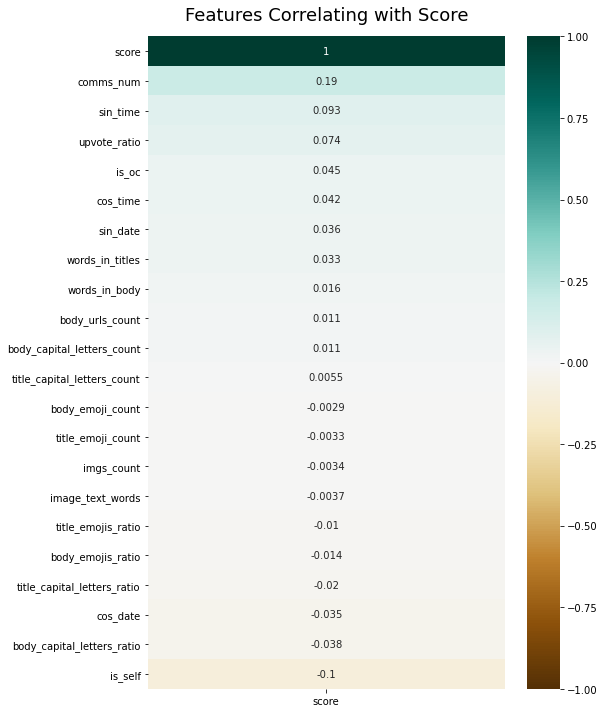

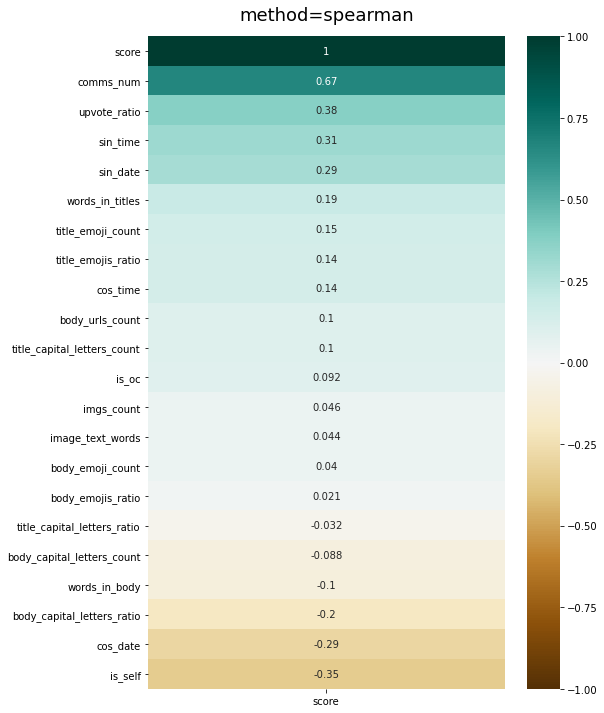

In [7]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical_data.corr()[['score']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Score', fontdict={'fontsize':18}, pad=16);

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical_data.corr(method='spearman')[['score']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('method=spearman', fontdict={'fontsize':18}, pad=16);

#### Liczba komentarzy oraz stosunek wgóręgłosów zmienia się w czasie. 

## Usunięcie widocznych redundancji

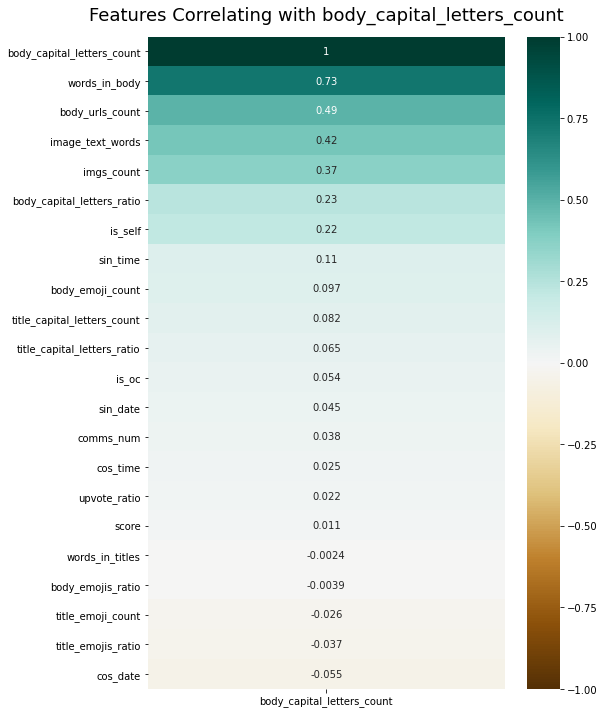

In [33]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical_data.corr()[['body_capital_letters_count']].sort_values(by='body_capital_letters_count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with body_capital_letters_count', fontdict={'fontsize':18}, pad=16);

#### Liczba wielkich liter w body posiada dużą korelację z liczbą słów w body. Jednocześnie Liczba słów w body ma większą korelacje z oceną. Liczbę wielkich liter w body należy uznać za atrybut redundantny.

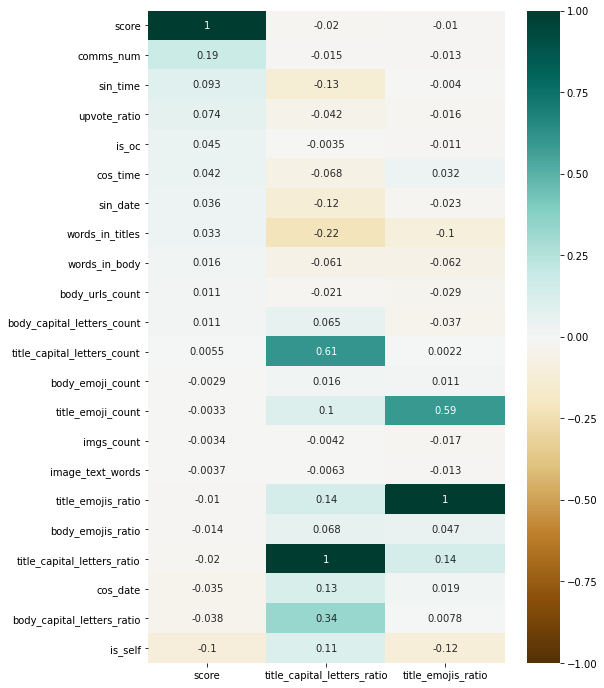

In [37]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical_data.corr()[['score', 'title_capital_letters_ratio', 'title_emojis_ratio']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with body_capital_letters_count', fontdict={'fontsize':18}, pad=16);

#### title_capital_letters_count oraz title_emoji_count zostają odrzucone

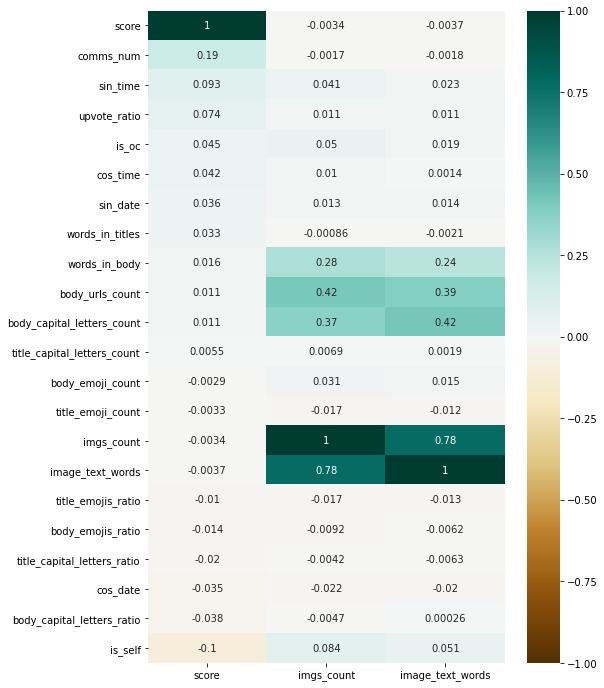

In [38]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical_data.corr()[['score', 'imgs_count', 'image_text_words']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

#### Liczba obrazków w poście posiada silną korelacje z liczbą słów na obrazku. Jednoczesnie obydwa atrybuty posiadają korelacje do oceny bliską zeru oraz dość dużą korelację do atrybutu body_urls_count. Zarówno imgs_count jak i image_text_words zosstaną usunięte.

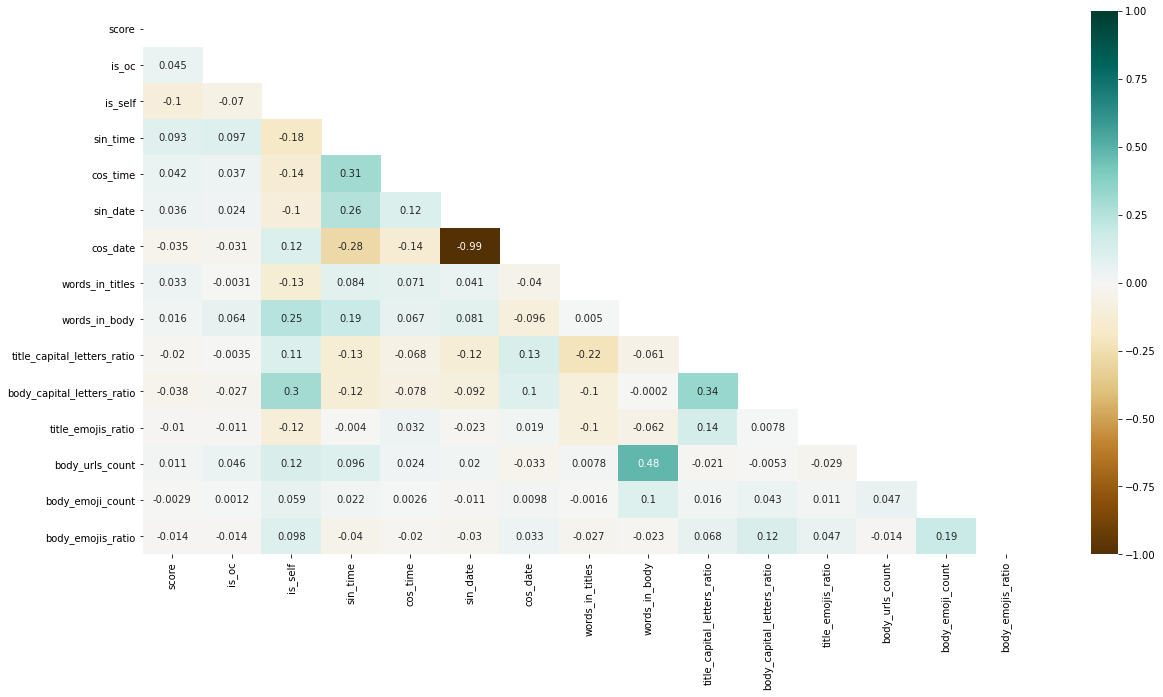

In [42]:
rejected_filtered = numerical_data[[
    'score', 
    'is_oc',
    'is_self',
    'sin_time',
    'cos_time',
    'sin_date',
    'cos_date',
    'words_in_titles',
    'words_in_body',
    'title_capital_letters_ratio',
    'body_capital_letters_ratio',
    'title_emojis_ratio',
    'body_urls_count',
    'body_emoji_count', 
    'body_emojis_ratio', 
]]

plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(rejected_filtered.corr(), dtype=np.bool))
heatmap = sns.heatmap(rejected_filtered.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Full Data Pearson correlation', fontdict={'fontsize':18}, pad=16);

#### Dłuższy post oznacza więcej linków. Czy usunąć liczbę linków w body?

## Korelacje z godziną 

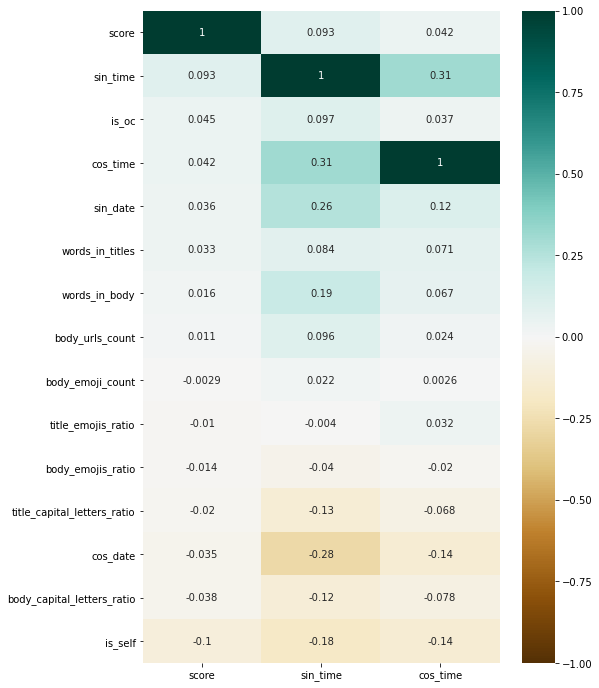

In [43]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(rejected_filtered.corr()[['score', 'sin_time', 'cos_time']].sort_values(by='score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Porównanie z odfiltrowanymi danymi

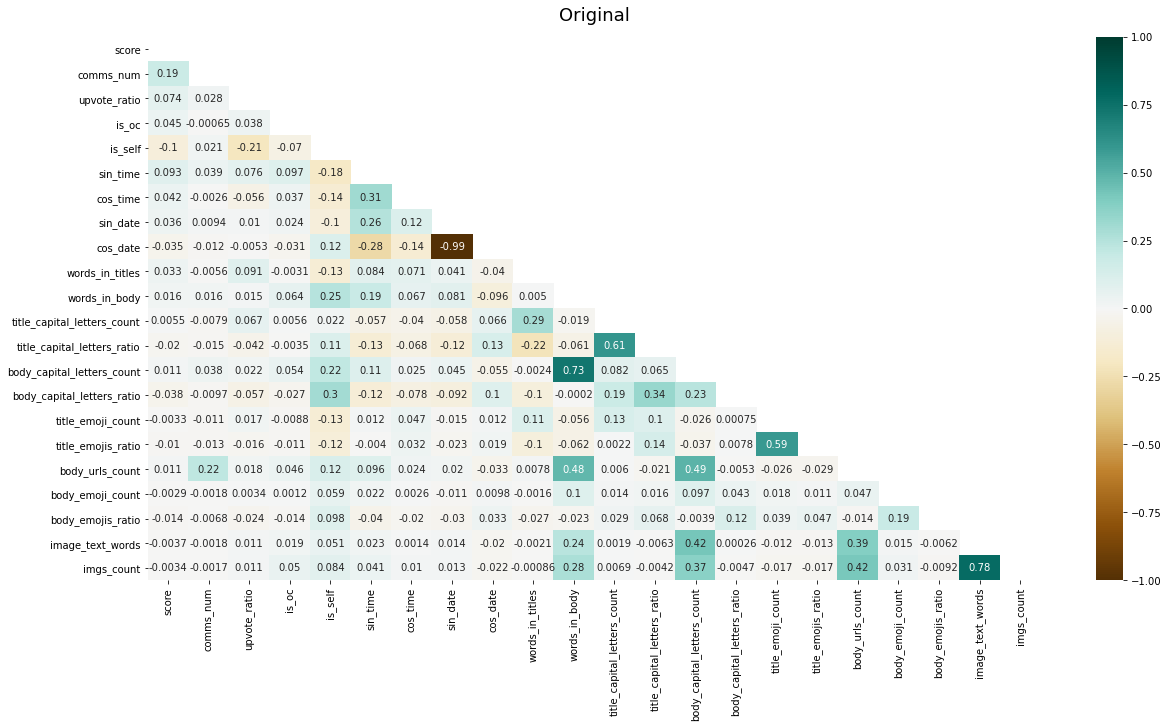

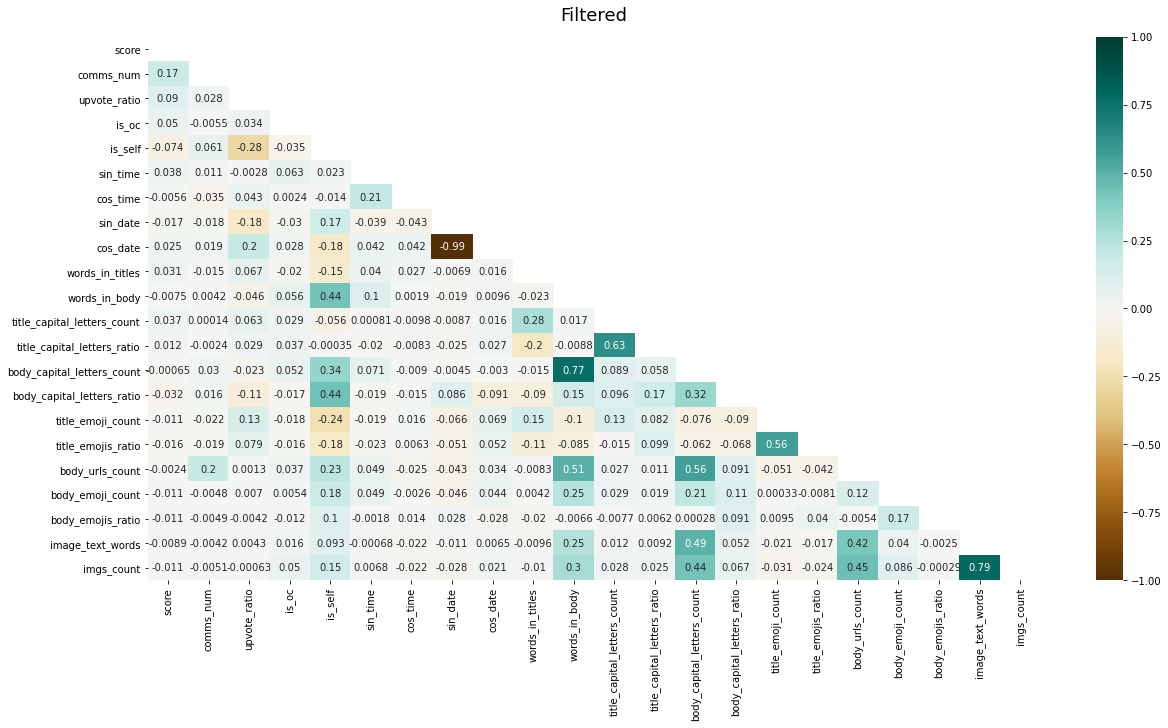

In [44]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(numerical_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Original', fontdict={'fontsize':18}, pad=16);

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(filtered_numerical_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(filtered_numerical_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Filtered', fontdict={'fontsize':18}, pad=16);

### Po redukcji

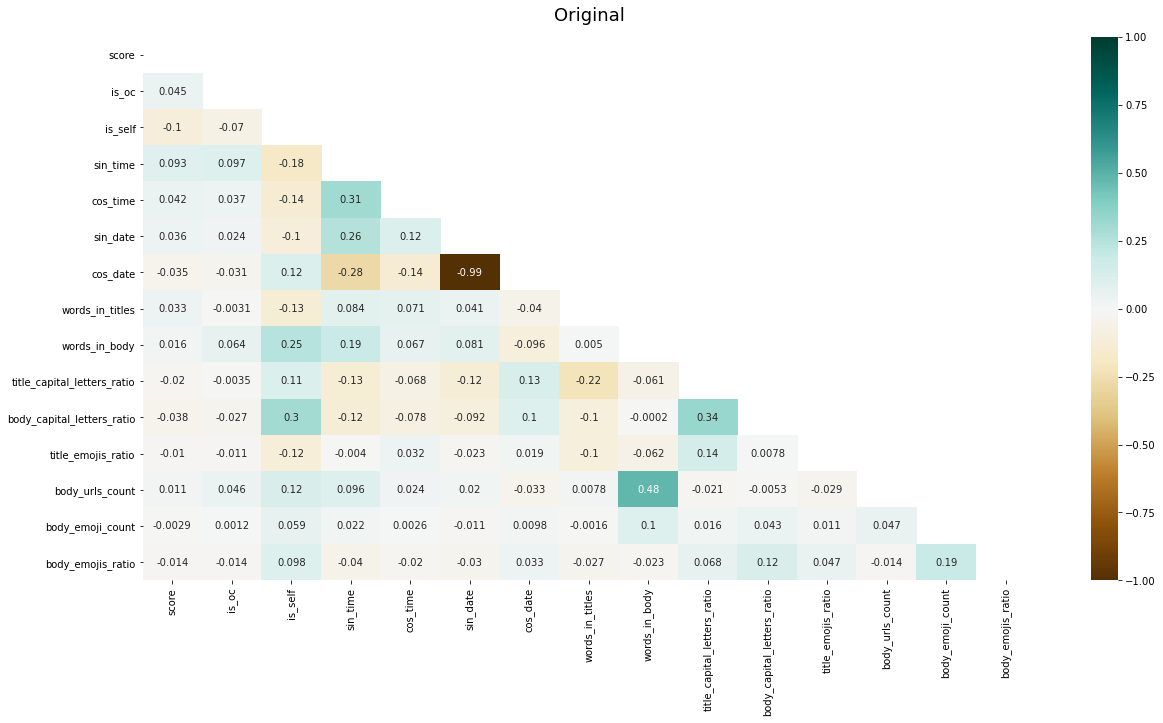

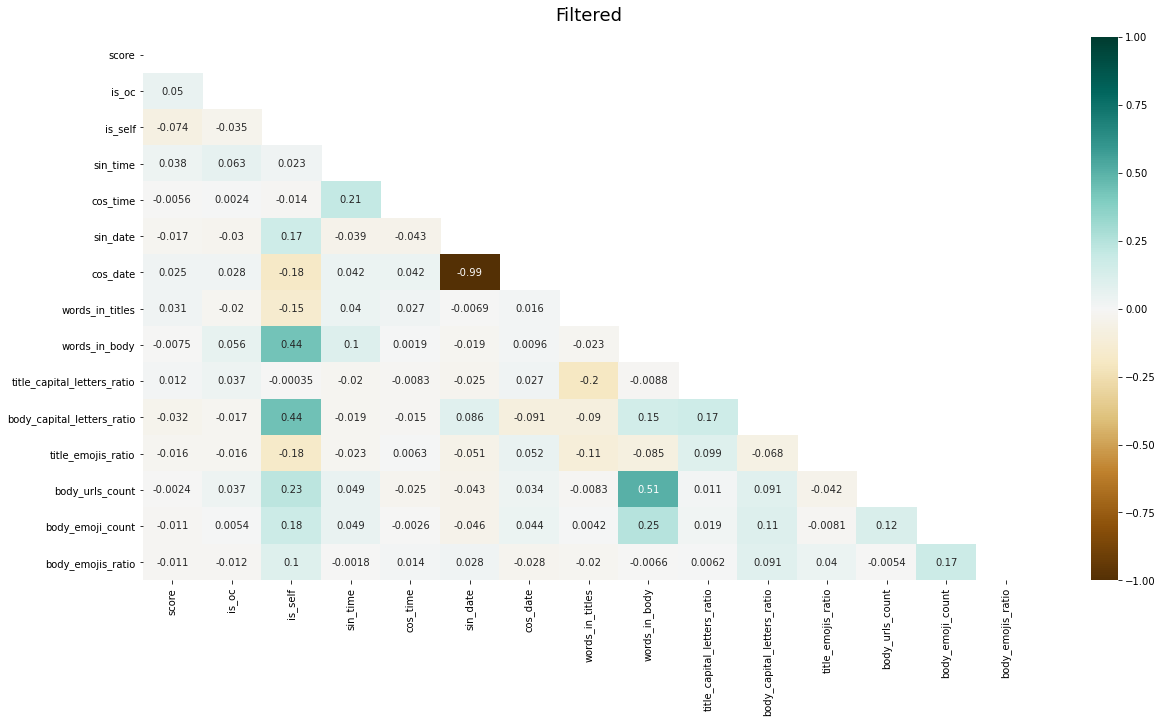

In [45]:
rejected_filtered_2 = filtered_numerical_data[[
    'score', 
    'is_oc',
    'is_self',
    'sin_time',
    'cos_time',
    'sin_date',
    'cos_date',
    'words_in_titles',
    'words_in_body',
    'title_capital_letters_ratio',
    'body_capital_letters_ratio',
    'title_emojis_ratio',
    'body_urls_count',
    'body_emoji_count', 
    'body_emojis_ratio', 
]]

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(rejected_filtered.corr(), dtype=np.bool))
heatmap = sns.heatmap(rejected_filtered.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Original', fontdict={'fontsize':18}, pad=16);

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(rejected_filtered_2.corr(), dtype=np.bool))
heatmap = sns.heatmap(rejected_filtered_2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Filtered', fontdict={'fontsize':18}, pad=16);

#### is_self posiada największą korelację z oceną, jednocześnie będąc w różnym stopniu skorelowany z innymi atrybutami. Usunać? 

#### Maksymalna dekorelacja atrybutów przez usunięcie is_self oraz words_in_body

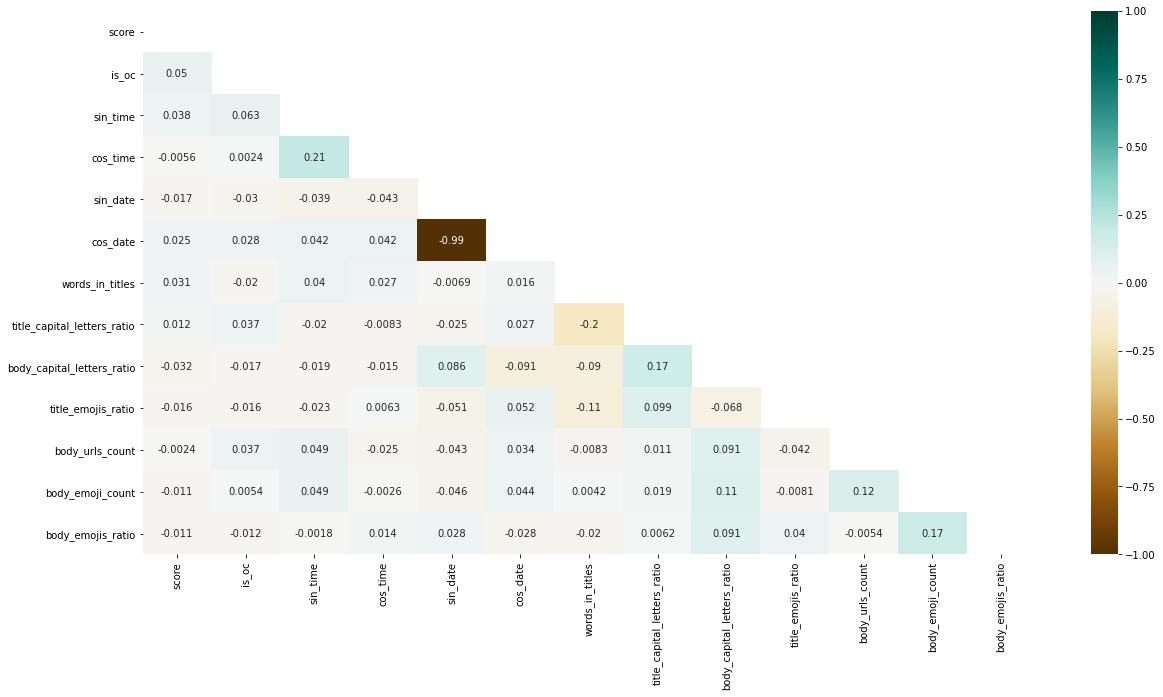

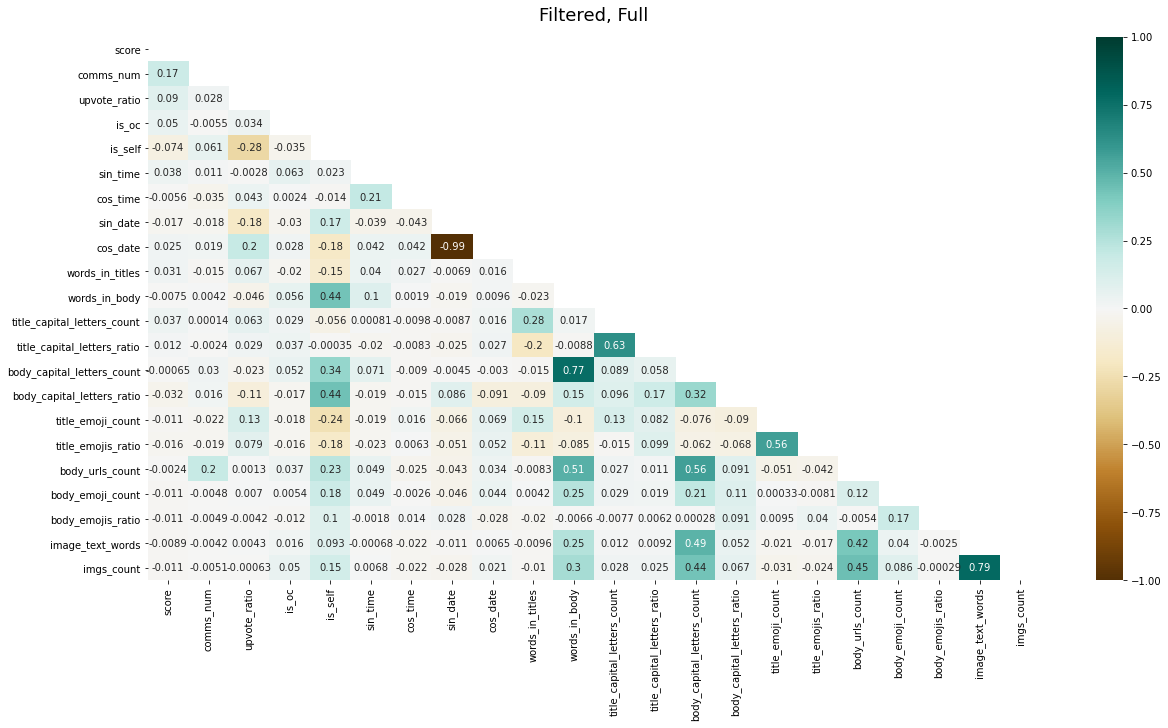

In [47]:
rejected_filtered_2 = filtered_numerical_data[[
    'score', 
    'is_oc',
    'sin_time',
    'cos_time',
    'sin_date',
    'cos_date',
    'words_in_titles',
    'title_capital_letters_ratio',
    'body_capital_letters_ratio',
    'title_emojis_ratio',
    'body_urls_count',
    'body_emoji_count', 
    'body_emojis_ratio', 
]]

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(rejected_filtered_2.corr(), dtype=np.bool))
heatmap = sns.heatmap(rejected_filtered_2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('', fontdict={'fontsize':18}, pad=16);

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(filtered_numerical_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(filtered_numerical_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Filtered, Full', fontdict={'fontsize':18}, pad=16);